Partie 1: Chargement librairies et données

In [7]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.8 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f90296ff76ab1190b3e5a562beb225db6ff757c11d54f10c8d9f895b05af4f90
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
import numpy as np

In [12]:
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [13]:
from sentence_transformers import SentenceTransformer

In [14]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

Partie 2: ACP

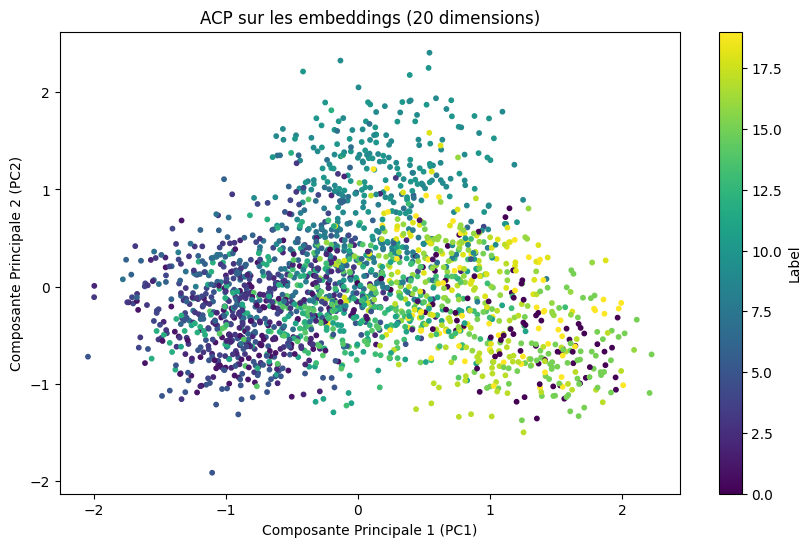

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Appliquer l'ACP avec 20 composantes principales
pca = PCA(n_components=20)
principal_components = pca.fit_transform(embeddings)

# Créer un DataFrame pour faciliter la manipulation des données
import pandas as pd
df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 21)])
df['Label'] = labels

# Visualiser les résultats
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Label'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Label')
plt.title('ACP sur les embeddings (20 dimensions)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.show()

Partie 3: Application k-means sur l'ACP

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


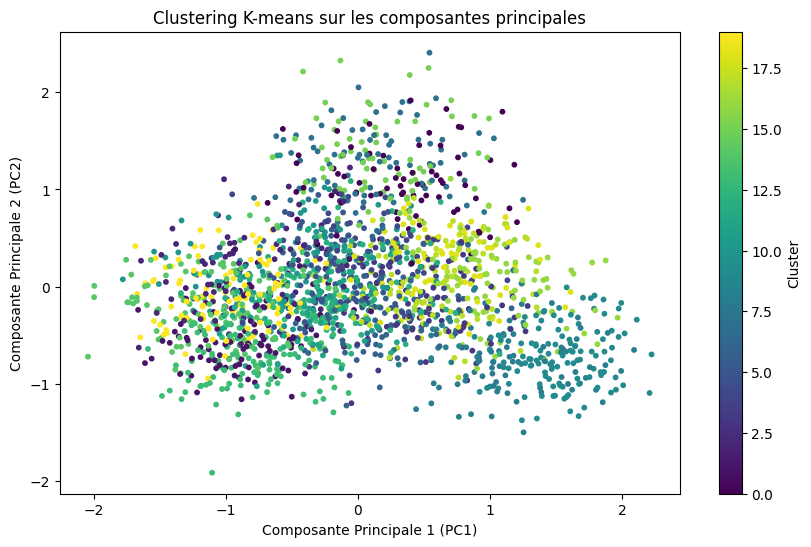

In [18]:
from sklearn.cluster import KMeans

# Appliquer K-means sur les composantes principales
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(principal_components)

# Visualiser les résultats du clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis', s=10)
plt.colorbar(scatter, label='Cluster')
plt.title('Clustering K-means sur les composantes principales')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.show()
